# Simulating a green golden rule

This notebook features a replication of the simulation of investment effects under a green golden rule, descirbed in [Annex 1](https://www.bruegel.org/sites/default/files/private/2024-06/Annexes.pdf) of ["A Quantitative Evaluation of the European Commission´s Fiscal Governance Proposal"](https://www.bruegel.org/working-paper/quantitative-evaluation-european-commissions-fiscal-governance-proposal) by Zsolt Darvas, Lennard Welslau, and Jeromin Zettelmeyer (2023).

The new fiscal framework could have been made more investment-friendly by introducing a rule that would have exempted Council-approved public investment (public investment justifying an extension of the adjustment period) from the application of the safeguards and the minimum adjustment requirement under the deficit-based EDP. The DSA requirements and the requirement to lower or keep the deficit below 3 percent of GDP would continue to apply (hence, we speak of ‘a fiscally responsible public investment rule’).

We simulate the impact of such temporary 0.5 percent of GDP extra investment for a period of six years (2025-2030) for the twelve EU countries that are expected to have higher than 60 percent of GDP public debt ratios in 2024 (Figure 1). We present a baseline scenario (without a new public investment programme) and an investment scenario with a temporary new investment programme. The net surplus in investment relative to the baseline scenario in the twelve countries would amount to 2.7 percent of annual GDP or about €407 billion in total over the six-year period. For the entire EU, net additional investment would amount to 2.8 percent of annual GDP or about €566 billion, in total over the six-year period.

The figure we create below shows that the debt ratio trajectories of even high-debt countries do not change much. The debt ratio under the temporary investment scenario is projected to decline a few years later than without the extra investment, yet the pace of debt reduction is almost identical. These calculations demonstrate that a rule of this type could be instrumental in facilitating the green transition, although it is consistent with the sustainability of public debt.

For comments and suggestions please contact lennard.welslau[at]gmail[dot]com. \
Last update: 01 June 2024

## Load DSA results created in "main.ipynb"

In [ ]:
# Import libraries and modules
import pandas as pd
import matplotlib.pyplot as plt

# Import DSA model class and stochastic subclass
import sys
import os
sys.path.append(os.path.abspath('..')) # Add parent directory to path
from classes import StochasticDsaModel as DSA
from classes import GroupDsaModel as GroupDSA
from functions import *

# Set autoreleoad
%load_ext autoreload
%autoreload 2

In [ ]:
# Define EU country codes, coutnries in EDP, and adjustment period for the DSA
countries = [
    'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 
    'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 
    'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE'
    ]
edp_countries=['BEL', 'FRA', 'ITA', 'HUN', 'MLT', 'POL', 'SVK', 'ROU']
adjustment_period = 7 

# Create a group of DSA models for all countries and call the optimization function
models = GroupDSA(
    countries=countries,
    adjustment_period=adjustment_period,
    )
models.find_spb_binding(
    edp_countries=edp_countries,     
    parallel=True, # parallelize the optimization
    max_workers=None, # number of parallel processes (None defaults to cores*5)
    discard_models=True # delete model instances from memory after completion (keeps results)
)

results_dict = models.results

Running find_spb_binding for 27 countries (parallel=True)


100%|██████████| 27/27 [02:53<00:00,  6.43s/it]


SPB table saved to ../output/green_golden_rule\spb_targets_7y.xlsx
DataFrames saved to ../output/green_golden_rule\timeseries_7y.xlsx


### Simulate investment scenario

In [4]:
# Define countries for investment scenario
high_debt_countries = [
    'AUT', 'BEL', 'CYP', 'FIN', 
    'FRA', 'DEU', 'GRC', 'HUN', 
    'ITA', 'PRT', 'SVN', 'ESP'
    ]

In [ ]:
# Run investment scenario
run_inv_scenario(
    countries=high_debt_countries, 
    results_dict=results_dict, 
    folder=folder
    )

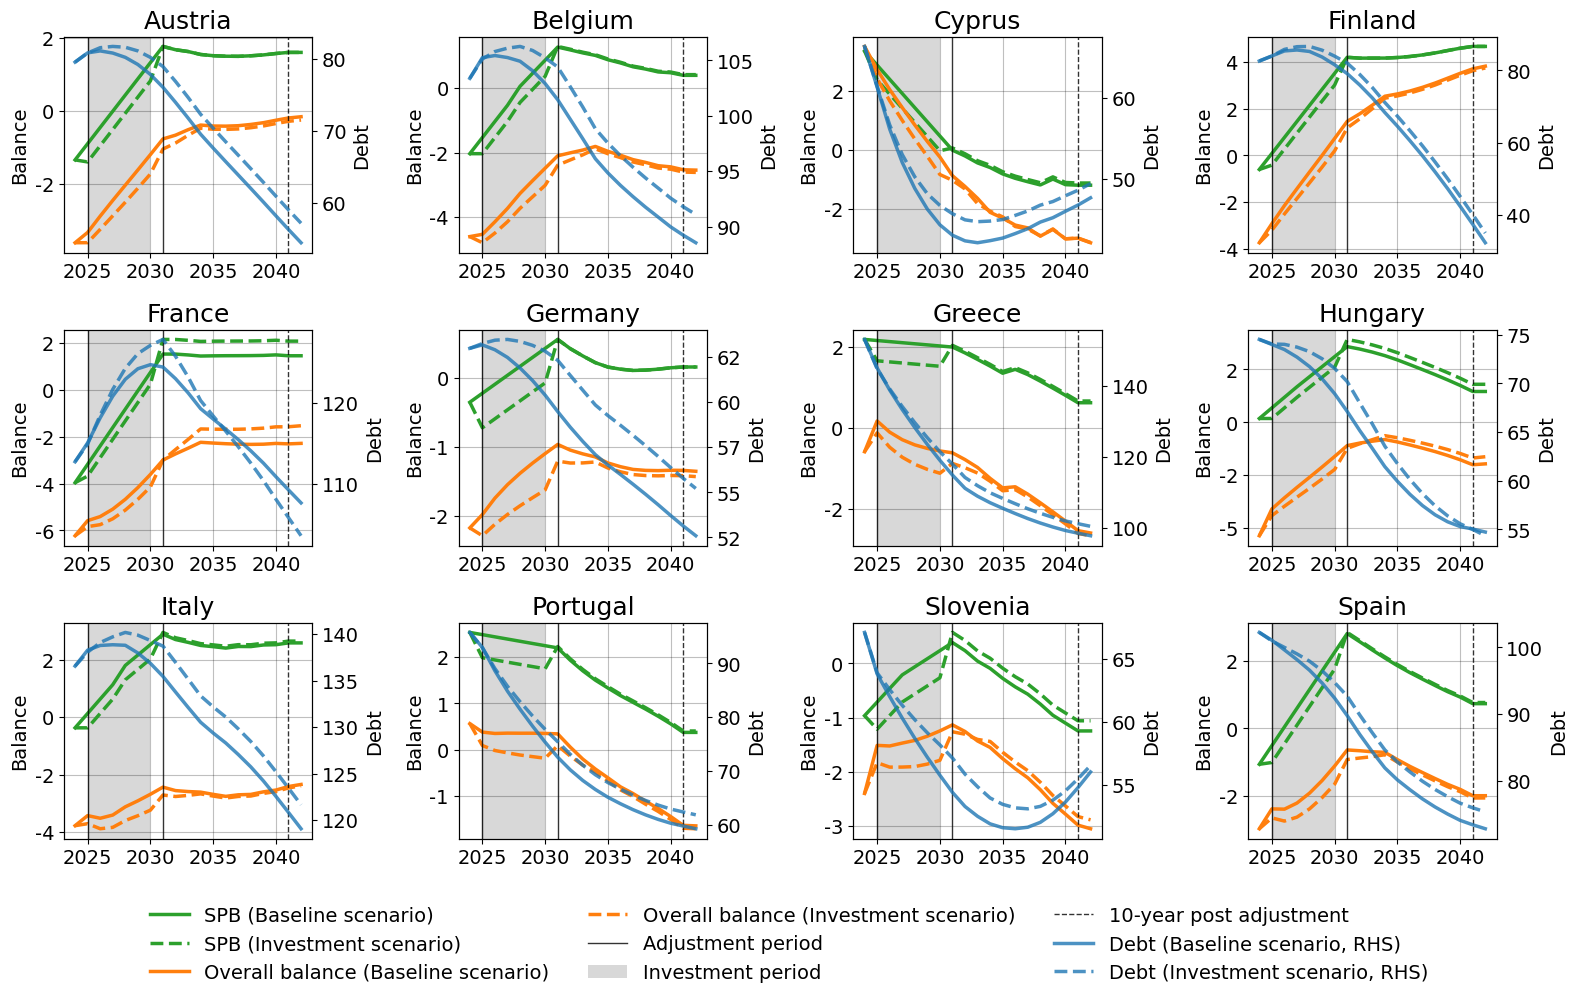

In [10]:
# Plot investment scenario
plot_inv(
    countries=high_debt_countries, 
    results_dict=results_dict, 
    folder=folder, 
    nrows=3, 
    ncols=4, 
    save_svg=False, 
    save_png=False,
    save_jpg=False
    )